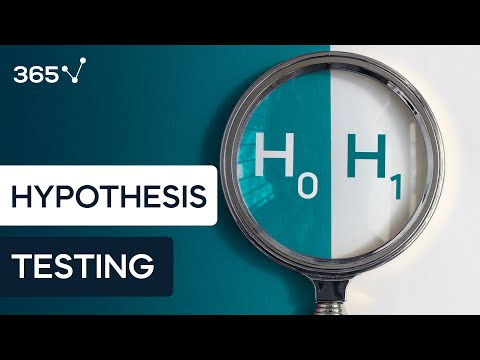

In [1]:
from IPython.display import YouTubeVideo
# First pre-lecture video: 
# "Hypothesis testing. Null vs alternative
# https://www.youtube.com/watch?v=ZzeXCKd5a18
YouTubeVideo('ZzeXCKd5a18', width=800, height=500)

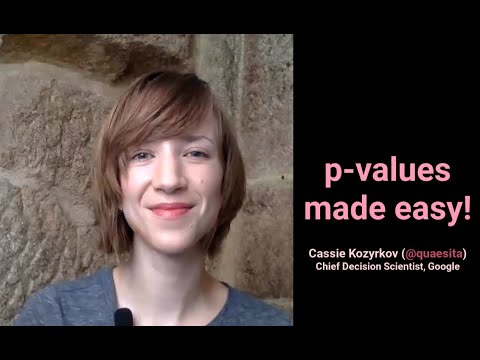

In [2]:
from IPython.display import YouTubeVideo
# Second pre-lecture video
# "What is a p-value"
# https://www.youtube.com/watch?v=9jW9G8MO4PQ
YouTubeVideo('9jW9G8MO4PQ', width=800, height=500)

# **1.**

The key factor that determines whether an idea can be examined and tested statistically is measurability or quantifiability. The idea must have variables that are known to be measurable, quantifiable, or possible to be categorized in a way such that it allows the collection of data. It can be tested statistically by assigning values from the observation data and use some mathematical/statistical formulas to analyze the resulting statistics. For example, "On average, river rocks are heavy" is an idea that cannot be tested statistically since the idea of "heavy" here is subjective without any objective threshold/comparison, while "On average, river rocks are heavier than 1 kg" can be tested statistically because of objective threshold/comparison. "On average, element 120 is more stable than Uranium" cannot be tested statistically as well because of no data on element 120 (or even its existence) as of October 2024.

Some criterias that defined a good null hypothesis are:
- It states the "no effect" outcome of the test (if two-tailed) or "status quo" of the test (two-tailed and one-tailed)
- The claim should be specific and can potentially be proven wrong through testing

The difference between null hypothesis and alternative hypothesis is that, null hypothesis is the base claim that you want to disprove, while the alternative hypothesis is a claim that contradicts the null hypothesis and the one you want to prove to be correct.

# **2.**

The goal in statistical testing is to "find" a population parameter through a sample. You might be wondering, why not just use the sample statistic? Well, there's a good reason to not do it.

Imagine you want to calculate the average weight of river rocks on the nearby river, but you only got like 100 rocks. First, you hypothesize that the average weight is 0.2 kg. Well, the first intuitive thing to do after that is to weigh each river rock and then calculate the average weight of the 100 rocks. Say, the average weight of the 100 rocks is 0.1 kg.

Now, at a glance, it may seem obvious that the average weight you hypothesize does not equal to the average weight of the 100 rocks. Does that mean your hypothesis is false? Not really, because you only have 100 rocks, while there are hundreds of thousands of river rocks on the same river. Who knows that you just so happen to mostly pick the lightest possible rocks? That's why we use some wacky statistic tricks like bootstrapping or p-value to estimate the actual average weight of all river rocks on the river.

The 100 rocks that you have, is called the samples ($x_i$'s). The 0.1 kg average you just got, is called sample statistic ($\overline x$). The average weight you want to search, is called population parameter ($\mu$). And the 0.2 kg you hypothesized, is the value you hypothesize to be equal to $\mu$ in a null hypothesis ($\mu_0$). Every time we do some statistical testing for a hypothesis, we will never use sample statistic; because the goal of the testing is to reject or not to reject the hypothesis about the population parameter $\mu$ (in this case, average weight of river rocks). And this is precisely why any outcome from the testing is always referred to as population parameter, not sample statistic.

# **3.**

Basically, p-value is a value that determines the probability that the sampling is as extreme or even more extreme than the original sample, assuming that the null hypothesis ($H_0$) is true. So, in the context of hypothesis testing, we can imagine a world where $H_0$ is true. Then, we try to simulate thousands of possibilities or worlds that adhere to $H_0$, and find the probability of a simulation that is as extreme or even more extreme than the original sample.

If the probability (or the p-value) is low enough, it might suggest that $H_0$ is most likely to be not true, therefore can be rejected with a certain confidence percentage.

Link + summary (q1-q3): https://chatgpt.com/share/670ec991-9fe4-8012-9a4a-6d0fb4403abc

# **4.**

If the p-value is low, it means that the original sample is a very rare case or an extremely rare case if $H_0$ were to be true. This is because based from instruction 3, p-value is the probability that the original sample statistic or a statistic more extreme than that (as in, as rare or rarer than the original sample) happened under the rule of $H_0$. In an intuitive way, low p-value basically means that getting the original sample if $H_0$ is true, is like getting a 6 two or three times in a row when rolling a d6. Because of this, low p-value means that it is more likely that the parameter in "status quo" (or default value) in $H_0$ might not be the default (or the "no effect") after all.

Note: I did not use ChatGPT for q4 because I already understand the concept of p-value from both the pre-lecture video and the response for q3 from ChatGPT

# **5.**

In [4]:
import numpy as np

# seed
np.random.seed(69)

sample_size=124
right_tilt=80
h0_statistic=sample_size/2 # in null hypothesis, the expected number of right tilt head while kissing is sample_size/2
n=10000 # number of simulations

simulated=np.zeros(n)
for i in range(0,n):
    # sample 124 numbers with same probability for 0 and 1 for each
    sampled=np.random.choice([0,1],124,replace=True)
    simulated[i]=sampled.sum()
    
extreme_sample=abs(simulated-h0_statistic) >= abs(right_tilt-h0_statistic)
p=extreme_sample.sum()/n

print(p)

0.0011


Since $0.001 < 0.0011 \leq 0.01$, this suggests strong evidence against null hypothesis.

Note: I did not use ChatGPT as well for q5 to train myself on building these type of codes with little help from AI.

# **6.**

Smaller p-value cannot definitively prove that the null hypothesis is false, and larger p-value also cannot definitively prove that the null hypothesis is true. This is because p-value is just a parameter of how likely (or unlikely) a null hypothesis is to be true. Low p-value can only show solid or strong evidence against null hypothesis, because statistical testing involves some uncertainty. Similarly, high p-value can only show that there's not enough evidence to reject null hypothesis, which means it can still be true or false.

About the low or high p-value to determine if null hypothesis is true or false, there is no threshold for that. This is because the uncertainty present in statistical testing makes it almost impossible to definitively prove or disprove null hypothesis. Although, p-value that is lower than certain threshold (like 0.05) can suggest a solid evidence that the null hypothesis is false.

# **7.**

In [2]:
import pandas as pd

patient_data = pd.DataFrame({
    "PatientID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Age": [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    "Gender": ["M", "F", "M", "F", "M", "F", "M", "F", "M", "F"],
    "InitialHealthScore": [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    "FinalHealthScore": [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
})

patient_data['HealthScoreChange'] = patient_data.FinalHealthScore-patient_data.InitialHealthScore

patient_data

,PatientID,Age,Gender,InitialHealthScore,FinalHealthScore,HealthScoreChange
0,1,45,M,84,86,2
1,2,34,F,78,86,8
2,3,29,M,83,80,-3
3,4,52,F,81,86,5
4,5,37,M,81,84,3
5,6,41,F,80,86,6
6,7,33,M,79,86,7
7,8,48,F,85,82,-3
8,9,26,M,76,83,7
9,10,39,F,83,84,1


In [6]:
# two tailed hypothesis testing from week 5 tutorial, demo II

np.random.seed(1)  # make simulation reproducible
number_of_simulations = 10000
n_size = len(patient_data)  # 10
IncreaseProportionSimulations_underH0random = np.zeros(number_of_simulations)

# generate "random improvement" proportions assuming H0 (vaccine has no average effect) is true 
# meaning that the "before and after" differences are positive or negative at "random"
for i in range(number_of_simulations):
    
    random_improvement = np.random.choice([0,1], size=len(patient_data), replace=True)

    IncreaseProportionSimulations_underH0random[i] = random_improvement.mean()
    
# "as or more extreme" relative to the hypothesized parameter of the statistic!
population_parameter_value_under_H0 = 0.5

observed_statistic = (patient_data.HealthScoreChange>0).mean()
simulated_statistics = IncreaseProportionSimulations_underH0random

# Be careful with "as or more extreme" as it's symmetric!
SimStats_as_or_more_extreme_than_ObsStat = \
    abs(simulated_statistics - population_parameter_value_under_H0) >= \
    abs(observed_statistic - population_parameter_value_under_H0)
    
p_value = (SimStats_as_or_more_extreme_than_ObsStat).sum() / number_of_simulations
print("Number of Simulations: ", number_of_simulations, "\n\n",
      "Number of simulated statistics (under HO)\n",
      'that are "as or more extreme" than the observed statistic: ',
      SimStats_as_or_more_extreme_than_ObsStat.sum(), "\n\n",
      'p-value\n(= simulations "as or more extreme" / total simulations): ', p_value, sep="")

Number of Simulations: 10000

Number of simulated statistics (under HO)
that are "as or more extreme" than the observed statistic: 680

p-value
(= simulations "as or more extreme" / total simulations): 0.068


In [7]:
# one tailed hypothesis testing
# here, the null hypothesis is that the proportion of people with improved health score are <= 50%

np.random.seed(1)  # make simulation reproducible
number_of_simulations = 10000
n_size = len(patient_data)  # 10
IncreaseProportionSimulations_underH0random = np.zeros(number_of_simulations)

# generate "random improvement" proportions assuming H0 (vaccine has no average effect)
# meaning that the "before and after" differences are positive or negative at random
for i in range(number_of_simulations):
    random_improvement = np.random.choice([0, 1], size=len(patient_data), replace=True)
    IncreaseProportionSimulations_underH0random[i] = random_improvement.mean()

# Null hypothesis parameter value under H0 (no improvement, i.e., 50% or less)
population_parameter_value_under_H0 = 0.5

# Observed statistic (proportion of patients with improvement in health scores)
observed_statistic = (patient_data.HealthScoreChange > 0).mean()

# One-tailed p-value calculation: Proportion of simulated statistics >= observed statistic
SimStats_greater_than_or_equal_ObsStat = simulated_statistics >= observed_statistic

# p-value for the one-tailed test
p_value_one_tailed = SimStats_greater_than_or_equal_ObsStat.sum() / number_of_simulations

print("Number of Simulations: ", number_of_simulations, "\n\n",
      "Number of simulated statistics (under H0)\n",
      'greater than or equal to the observed statistic: ',
      SimStats_greater_than_or_equal_ObsStat.sum(), "\n\n",
      'p-value (one-tailed): ', p_value_one_tailed, sep="")

Number of Simulations: 10000

Number of simulated statistics (under H0)
greater than or equal to the observed statistic: 565

p-value (one-tailed): 0.0565


The only thing changed in this code is that the numerator of p-value formula is that if for two tailed it's number of simulations that are more "extreme" than observed sample, then for one tailed it's simply number of simulations that are "better" than observed sample.

The difference here is that for two tailed hypothesis testing, we measure the odds of simulations that deviates from null hypothesis as much or even more than observed sample (which means, also counting the number of simulations that has a lot of negative health score changes), while for one tailed hypothesis, we measure the odds of simulations which has as many or more positive health score changes than observed sample. Notice that in one tailed, it is directional to the positive side.

The p-value of one tailed test should indeed expected to be smaller than two tailed test, as the number of simulations we checked in one tailed are the ones to the positive direction, while in two tailed, the ones that we checked are the ones to both positive and negative direction, making the number of simulations that satisfy it larger, if not equal.

Link + summary (q6-q7): https://chatgpt.com/share/670f2612-8c40-8012-8d75-2b433dff745f

# **8.**

## **Problem Introduction**

### **Relationship between this experiment and the original with Fisher and Bristol**

The relationship between these two experiments is that both are designed to determine whether the outcomes are from guessing or if there is a statistically significant ability to differentiate. The differences between the two experiments are different sample size and population focus, where the original is more personalized to assessing personal ability under a controlled setting, while this experiment is more to if they can distinguish pouring order by chance or if some form of skill or perception is involved.

### **Null Hypothesis and Alternative Hypothesis**

For this experiment, the null hypothesis would be that each students are just guessing, which means that $\leq 50\%$ of the times, the guessing is correct. Meanwhile, the alternative hypothesis would be that the population has a statistically significant average skill or ability to differentiate, which means that $> 50\%$ of the times, the guessing is correct.

Formally, let $\mu$ be the proportion of the students population that can guess corrently. Then:
$$H_0 : \mu \leq 0.5$$
$$H_1 : \mu > 0.5$$

## **Quantitative Analysis**

### **Methodology Code and Explanation**

The methodology that I will be using here is one-tailed p-value testing. P-value testing is a fundamental concept in statistical hypothesis testing, used to help determine whether the results of an experiment or study are significant or likely to have occurred by chance. The p-value is the probability of obtaining test results at least as extreme as the observed data, under the assumption that the null hypothesis is true. In simpler terms, it tells us how likely it is that the observed outcome (or something more extreme) could have happened by random chance if the null hypothesis were true.

I will use the resulting p-value compared to $\alpha$-significance to determine whether I can reject $H_0$ or not. Since I want 95% accuracy or confidence, $\alpha = 0.05$. This code below will demonstrate how one-tailed p-value testing works.

In [10]:
import numpy as np

# feelin lucky today
np.random.seed(777)

sample_size=80
correct_guess=49
observed_stats=correct_guess/sample_size
n=10000 # simulation number

simulated=np.zeros(n)
for i in range(0,n):
    # sample 80 students with same probability for 0 and 1 for each (1 means guess success, 0 means not)
    sampled=np.random.choice([0,1],sample_size,replace=True)
    simulated[i]=sampled.mean()
    
extreme_sample=simulated >= observed_stats
p=extreme_sample.mean() # since extreme sample record 1 as sample with "better" statistic, average is basically the p-value

print(p)

0.0282


### **Visualization**

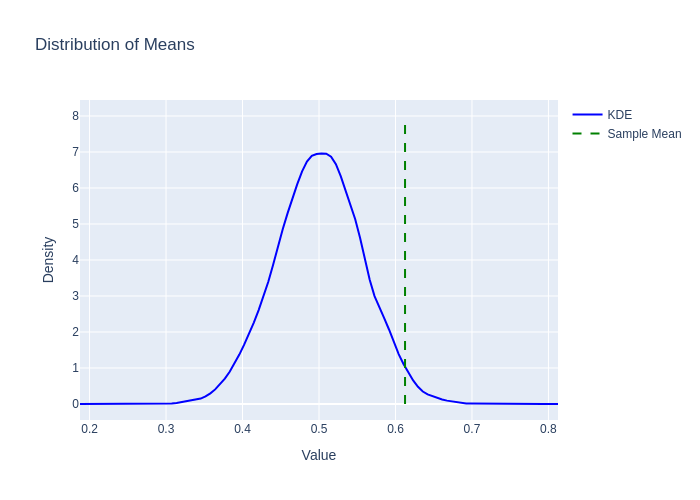

In [18]:
import plotly.graph_objects as go
import plotly.express as px
from scipy.stats import gaussian_kde

data = simulated

kde = gaussian_kde(data)

x_vals = np.linspace(min(data) - 0.1, max(data) + 0.1, 100)
kde_vals = kde(x_vals)

fig = go.Figure()

# Add the KDE line
fig.add_trace(go.Scatter(x=x_vals, y=kde_vals, mode='lines', name='KDE', line=dict(color='blue')))

fig.add_trace(go.Scatter(x=[observed_stats, observed_stats], 
                         y=[0, 8], mode='lines', line=dict(color='green', dash='dash'),
                         name='Sample Mean'))

# Update layout
fig.update_layout(title='Distribution of Means',
                  xaxis_title='Value',
                  yaxis_title='Density')

fig.show(renderer='png')

## **Findings and Discussions**

### **Conclusion regarding Null Hypothesis**

From the code above, we get that the p-value is $0.0282$. Since $p = 0.0282 < 0.05 = \alpha$ (p-value is lower than $\alpha$-significance), we can reject $H_0$ or the null hypothesis.

In other words, it's likely that the students population have a statistically significant ability to differentiate or guess correctly. Although, this does not mean that it is certain or definitive, as this statistical testing still brings uncertainty. It's just that since the p-value is lower than the $\alpha$-significance, we have a solid evidence to reject the null hypothesis.

Link + summary (q8): https://chatgpt.com/share/670f35b4-4284-8012-bdd0-9b9a66859a90

# **9.**

I may have understand everything from the textbook material, although I might need to review it again at some point in the future to sharpen it :p